<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_10_14_%EA%B3%BC%EC%A0%9C_%EB%91%90%EC%9E%87_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

두잇 판다스 입문

>datetime 오브젝트로 변환하기 - to_datetime 메서드

시계열을 문자열로 저장해야할 때, 문자열은 시간 계산은 불가능하므로 datetime 오브젝트로 변경 필요.

In [1]:
#문자열을 datetime 오브젝트로 변환하기

#01. 먼저 ebola 데이터 집합 불러온다
import pandas as pd
import os

ebola=pd.read_csv('country_timeseries.csv')

In [2]:
#02. ebola 데이터 프레임을 보면 문자열로 저장된 date 열이 있다
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [3]:
#03. to_datetime 메서드를 사용하면 date 열의 자료형을 datetime 오브젝트로 변환 가능. 새로운 열로 추가하자.
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [4]:
#04. 더 자세히 보자. 시간 형식 지정자와 기호를 조합하여 format 인자에 전달하면 그 형식에 맞는 datetime 오브젝트를 얻을 수 있다.
test_df1=pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

test_df2=pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15
  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


>시간 형식 지정자

%a 요일 이름 / %A 긴 요일 이름 / %w 0부터 일요일인 요일 숫자
<br/>%b 월 / %B 긴 월 이름
<br/>%H 24시간 / %I 12시간 / %p am, pm
<br/>%c 날짜와 시간 / %x 날짜 / %X 시간 / %G 년도 / %u 요일

In [6]:
from datetime import datetime

In [7]:
#시계열 데이터 구분해서 추출
now=datetime.now()
print(now)

2022-10-10 17:28:23.618067


In [8]:
nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

2022-10-10


In [9]:
nowTime=now.strftime('%H:%M:%S')
print(nowTime)

17:28:23


In [10]:
nowDatetime=now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2022-10-10 17:28:23


>datetime 오브젝트로 변환하기 - read_csv 메서드

In [11]:
#datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

#01. parse_dates 인자에 전달
ebola1=pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

>datetime 오브젝트에서 날짜 정보 추출하기

In [12]:
#01. 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것
date_series=pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [13]:
#02. datetime 오브젝트의 속성을 이용하면 바로 추출 가능
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


>dt 접근자 사용하기

문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용했어야함. datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드 사용 가능.

In [14]:
#dt 접근자로 시계열 데이터 정리하기

#01. ebola 불러와 Date 열을 datetime 오브젝트로 변환하여 새로 추가.
ebola=pd.read_csv('country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

In [16]:
#02. dt 이용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터 추출
print(ebola[['Date', 'date_dt']].head())

print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [17]:
#03. 위는 불편. dt 접근자로 date_dt 열에 한번에 접근하여 속성을 이용해 추출하고 새로운 열에 추가.
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [18]:
#04. 위를 응용해 월, 일 데이터를 새로 추가
ebola['month'], ebola['day']=(ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [19]:
#05. ebola 데이터 프레임에 새로 추가한 열들의 자료형을 출력해보면 date_dt는 datetime 오브젝트고 나머지는 정수형이다.
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##12-2 사례별 시계열 데이터 계산하기

>에볼라 최초 발병일 계산하기

In [21]:
#01. ebola 마지막 살펴보자. 시간이 역순.
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [22]:
#02. 에볼라 시작일 2014년 3월 22일. min 메서드로 찾자.
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [23]:
#03. Date 열에서 최초 발병일 빼면 에볼라의 진행 정도를 알 수 있다.
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


>파산한 은행의 개수 확인하기

In [24]:
#01. 파산 은행 불러오고 살펴보자. closing date, updated date 열의 자료형이 시계열이다.
banks=pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [25]:
#02. closing date, updated date 열의 데이터 자료형이 문자열. parse_dates 이용해 datetime으로 변환해 불러오자.
banks_no_dates=pd.read_csv('banklist.csv')
print(banks_no_dates.info())

banks=pd.read_csv('banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null 

In [26]:
#03.dt 접근자, quarter 속성 이용하면 은행이 파산한 분기를 알 수 있다. 새로 추가하자.
banks['closing_quarter'], banks['closing_year']=(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [27]:
#04. 연도별로 파산한 은행이 얼마나 되는지 보자.
closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [28]:
#05. 연도별, 분기별로 파산한 은행의 개수도 보자.
closing_year_q=banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

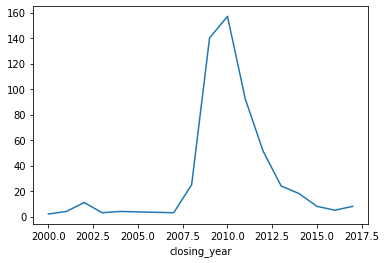

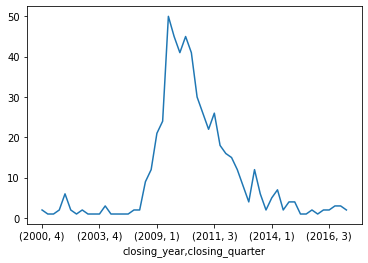

In [29]:
#06. 그래프도 그리자
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax=closing_year.plot()
plt.show()

fig, ax=plt.subplots()
ax=closing_year_q.plot()
plt.show()